In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Хорошие практики ML

Сегодня будем работать с модулями питона. Чтобы не было проблем, подключим автоматическое обновление подмодулей, чтобы юпитер автоматически подтягивал обновления в коде

In [1]:
%load_ext autoreload
%autoreload 2

## Графики должны быть читаемы

На графиках должен быть весь необходимый контекст: подписи на осях, легенда, заголовок, выделение цветами.

График должен быть самодостаточен и должен нуждаться в минимальном количестве комментариев. Если комментарий можно отобразить графически, лучше так и сделать.

Посмотрите как график будет выглядеть в презентации/в вордовском документе, возможно стоит увеличить шрифт или изменить масштаб.

Всегда спрашивайте себя - если бы человек со стороны увидел график, понял бы он о чем идет речь?

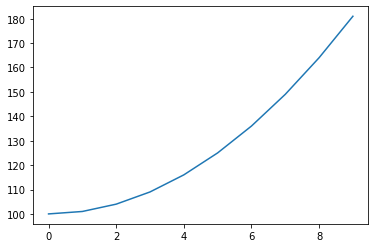

In [20]:
x = np.arange(0, 10)
y = 100 + x ** 2

plt.plot(x, y)

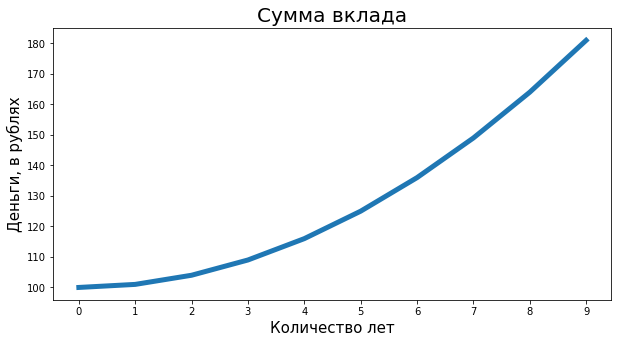

In [21]:
plt.figure(figsize=(10, 5))
plt.xlabel('Количество лет', fontsize=15)
plt.ylabel('Деньги, в рублях', fontsize=15)
plt.title('Сумма вклада', fontsize=20)
plt.xticks(x)
plt.plot(x, y, linewidth=5)

## Сериализация моделей

In [24]:
import pickle
from sklearn.linear_model import LinearRegression

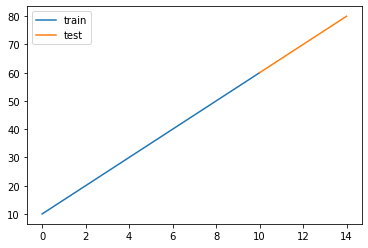

In [29]:
x = np.arange(0, 11).reshape(-1, 1)
y = 10 + 5 * x
model = LinearRegression()
model.fit(x, y)

x_test = np.arange(10, 15).reshape(-1, 1)
y_test = model.predict(x_test)

plt.plot(x, y)
plt.plot(x_test, y_test)
plt.legend(['train', 'test'])

Сохраняем модель

In [33]:
serialized_model = pickle.dumps(model)
with open('model.pickle', 'wb+') as file:
    file.write(serialized_model)

Загружаем модель

In [37]:
with open('model.pickle', 'rb') as file:
    content = file.read()
model = pickle.loads(content)
model.coef_, model.intercept_

(array([[5.]]), array([10.]))

При помощи pickle можно сохранить любой питоновский объект. [Но это не очень безопасно](https://habr.com/ru/company/otus/blog/353480/).

## Классы в Python

Теория хорошо описана здесь: https://docs.google.com/presentation/d/1zbQm3KfgEcqRkBhHCL3Ur27iReTc9SCHI6NJW64VfJw/edit?usp=sharing

Классы позволяют объявлять свои типы данных и самому определять какие бывают функции и поля у объекта

Нам это может быть полезно если мы хотим привести все модели к "одному знаменателю".

Например, в `tensorflow` и `sklearn` отличаются функции `fit` и `predict`, но мы можем написать свой класс, в который обернем модель `tensorflow` и самостоятельно опишем методы `fit` и `predict`

Напишем модель, которая решает задачу классификации при помощи рандома

In [31]:
class RandomModel:
    
    def __init__(self, n_classes):
        # К полям класса обращаемся через self
        self.n_classes = n_classes
        
    def fit(self, x, y):
        # Нам не нужно обучаться на данных, поэтому пропускаем
        # Если бы делали обертку над другой моделью, то тут бы вызвали fit
        pass
    
    def predict(self, x):
        examples = len(x)
        # Вернем случайный прогноз для каждого элемента выборки
        # Если бы делали обертку над другой моделью, то тут бы вызвали predict
        return np.random.randint(0, self.n_classes, size=examples)
    
    def get_params(self, **kwargs):
        # Нужно определить для того, чтобы cross_val_score мог создавать внутри себя новые модели с такими же параметрами
        return {'n_classes': self.n_classes}

Более подробно о том, какие еще функции можно определить и как вообще реализованы модели sklearn можно почитать тут: https://scikit-learn.org/stable/developers/develop.html

Чего нет в этом классе, но что должно быть в вашей модели:

- проверка на совместимость размерностей `x` и `y` в методе fit
- аргумент `random_state`, чтобы все вычисления были воспроизводимы
- fit и predict должны также принимать `**kwargs`, чтобы быть совместимыми с другими моделями

In [27]:
# Возьмем задачу бинарной классификации
model = RandomModel(2)

# Обучимся на пустом датасете (все равно обучения нет)
model.fit([], [])

# Предскажем
model.predict([[1], [2]])

array([0, 1])

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
model.get_params(deep=False)

{'n_classes': 2}

In [30]:
x = [[i] for i in range(100)]
y = [0 for i in range(100)]
cross_val_score(model, x, y, scoring='accuracy')

array([0.45, 0.5 , 0.3 , 0.4 , 0.35])

## Задача

Написать обертку над моделью RandomForestClassifier. Модель должна делать тоже самое, но должна называться CustomRandomForest.

In [61]:
from sklearn.ensemble import RandomForestClassifier

class CustomRandomForest:
    # Ваш код здесь
    pass

В обеих ячейках должно вернуться одно и тоже

In [ ]:
model = CustomRandomForest(n_estimators=100)
model.fit(x, y)
model.predict(x)

In [45]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x, y)
model.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Парсинг данных

Часто бывает так, что данные для анализа еще не собраны, либо собраны и лежат на отдельном сервере, и их нужно загрузить для того, чтобы обрабатывать.

Обычно данные можно достать через REST API. Это означает, что мы можем отправить запрос по какому-то URL-у и получить какие-то данные. 

Будем работать с открытым API по Игре престолов

https://anapioficeandfire.com/Documentation

Будем отправлять запрос на сервер, а в ответ нам будет приходить информация в формате JSON (по структуре похожа на словарь). Мы можем распарсить JSON и использовать информацию, которая там находится

Список других открытых API можно найти здесь: https://github.com/public-apis/public-apis

In [13]:
import requests
import json

In [17]:
url = 'https://anapioficeandfire.com/api/characters/1'
response = requests.get(url)
data = response.json()
data

{'url': 'https://anapioficeandfire.com/api/characters/1',
 'name': '',
 'gender': 'Female',
 'culture': 'Braavosi',
 'born': '',
 'died': '',
 'titles': [''],
 'aliases': ['The Daughter of the Dusk'],
 'father': '',
 'mother': '',
 'spouse': '',
 'allegiances': [],
 'books': ['https://anapioficeandfire.com/api/books/5'],
 'povBooks': [],
 'tvSeries': [''],
 'playedBy': ['']}

Также полезно проверять `status_code`

200 - OK

404 - Not found

403 - Forbidden

500 - Internal Server Error

In [20]:
url = 'https://anapioficeandfire.com/api/characters/1'
response = requests.get(url)
response.status_code

200

In [21]:
url = 'https://anapioficeandfire.com/api/characters/10000'
response = requests.get(url)
response.status_code

404

## Задача

Собрать информацию о всех персонажах и посчитать сколько из них мужчины, а сколько женщины для первых 100 персонажей

__Внимание!__ Есть лимит на отправку запросов. За сутки с одного IP адреса можно отправить не более 20000 запросов на сайт.

Лучше сначала написать код и проверить его на маленьком диапазоне персонажей, а потом пробовать на всех.

Если вы достигли лимита, то `status_code` будет 403

## Задача

Для страницы с персонажами можно использовать пагинацию, чтобы выгружать информацию сразу по нескольким персонажам за один запрос.

Пример:

`https://www.anapioficeandfire.com/api/characters?page=1&pageSize=10`

Выгрузить первые 10 страниц размером 50. Посчитать персонажей, у которых есть оба родителя.

## Задача

Посчитать сколько страниц во всех книгах Игры Престолов

## Задача

Посчитать в скольки книгах встречается каждый персонаж

Есть ли персонажи, которые участвуют во всех книгах? Если да, вывести их имена

Если нет, вывести имена персонажей, которые встречаются в макисмальном количестве книг

## Задача (мини-проект)

Нужно провести небольшое исследование по датасету https://www.kaggle.com/jp797498e/twitter-entity-sentiment-analysis

Что необходимо сделать:

1. Скачать и прочитать данные. 
2. Построить графики с распределение классов, понять какую метрику необходимо использовать. Графики должны быть подписаны по обеим осям и должны иметь название (title).
3. Предобработать данные (лемматизация/стемминг, убрать пунктуацию, расшифровать сокращения и тд).
4. Построить модели, оценить качество.
5. Получить оценку сентимент-анализа для своего предложения.
6. Написать функции для чтения данных, для построения графиков, для предобработки данных и остального. Каждая функция должна выполнять какое-то атомарное действие и называться соответствующим образом.
7. Сохранить модели в файлы pickle.

## Задача (продолжение)

Написать скрипты, которые будут проводить сентимент-анализ по введенной пользователем фразе. Например, так:

### Прогноз

`python predict.py --phrase "very positive tweet"`

`Answer: Positive`

### Обучение модели

`python train.py --dataset data/twitter_training.csv`

`Model saved at model/weight.pickle`

### Валидация модели

`python validate.py --dateset data/twitter_validation.csv`

`Mean cross-validation accuracy: 0.75`

# Полезные ссылки

Лучше сразу определиться, чем конкретно хочется заниматься, искать на том же hh.ru требования в вакансиях и изучать нужные инструменты.

## Курсы по питону

[Базовый курс по питону](https://stepik.org/course/67/syllabus)

[Подробный курс по питону](https://stepik.org/course/512/syllabus)

[Fluent Python - книга для глубокого погружения в питон. Не для начинающих.](https://www.oreilly.com/library/view/fluent-python/9781491946237/) Можно найти pdf-версию бесплатно на просторах интернета.

## Мои курсы

[Мой курс по питону для студентов СПбГУ на степике](https://stepik.org/course/74989/info)

[Мой курс по продвинутому питону для студентов ВШЭ](https://drive.google.com/drive/folders/1EdPbnImcIt0Hrjy56FveACdM-uc2anCP?usp=sharing)

[Записи занятий с курса по продвинутому питону](https://youtube.com/playlist?list=PLxMpIvWUjaJsIRZ_Vphu0Oqylm0KOK1I8)

## Курсы по анализу данных

Курсы на курсере можно слушать бесплатно. Чтобы получить доступ к домашкам, можно либо запросить финансовую помощь, либо оплатить курс.

Финансовую помощь по первой специализации (6 курсов) одобряют вообще всем.

[Специализация из 6 курсов от Яндекса и МФТИ. Покрывается много тем, но нет нейросетей.](https://www.coursera.org/specializations/machine-learning-data-analysis)

[Специализация из 5 курсов по глубокому обучению](https://www.coursera.org/specializations/deep-learning)

## Визуализация данных

[11 правил визуализации данных](https://habr.com/ru/company/netologyru/blog/341364/)

[Как строить красивые графики на Python с Seaborn](https://habr.com/ru/company/otus/blog/540526/)

[Чем можно вдохновляться при построении графиков](https://www.reddit.com/r/dataisbeautiful/)

[Что можно сделать при помощи Plotly](https://tproger.ru/translations/python-data-vizualization/)

[Шпаргалка по Plotly](https://habr.com/ru/post/502958/)

## Построение пайплайнов

Если по официальной документации будет что-то не получаться, то можно посмотреть видео на ютубе по этой же теме

[Snakemake](https://snakemake.readthedocs.io/en/stable/tutorial/tutorial.html)

[Airflow](https://airflow.apache.org/docs/apache-airflow/stable/start/index.html)

## Прохождение собеседований

[Сервис с вопросами на собеседованиях](https://interview-mds.ru/)

[Широкий список тем того, что могут спросить на собесе](https://tproger.ru/translations/preparing-for-data-science-interview/)

[Еще вопросы с собеседований](https://habr.com/ru/company/skillfactory/blog/551004/)

[Оформление гитхаба](https://tproger.ru/articles/how-to-prepare-your-github-profile/)

## Каналы на YouTube

[Karpov.Courses - про карьеру в DS и сам DS](https://www.youtube.com/c/KarpovCourses)

[StatQuest - про статистику и DS](https://www.youtube.com/c/joshstarmer)

[3Blue1Brown - красивые и понятные визуализации по математике](https://www.youtube.com/c/3blue1brown)

[Fless - собеседования по DS](https://www.youtube.com/c/Fless)

[Канал для разработчиков от Яндекса. Полезные лекции.](https://www.youtube.com/c/%D0%A0%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0/)

[Яндекс Академия - лекции по разным направлениям в айти.](https://www.youtube.com/channel/UCTUyoZMfksbNIHfWJjwr5aQ)

## Каналы и чаты в Telegram

[Чат с коммьюнити и разработчиками CatBoost](https://t.me/catboost_ru)

[Open Data Science - самое большое коммьюнити по DS](https://ods.ai/)

[ODS Pet Projects - тут можно с кем-то объединиться и сделать свой пет-проект](https://t.me/ods_pet_projects)

[Мамкин data scientist - море полезных ссылок и постов про DS. Сейчас канал мертв.](https://t.me/mommyscience)

## Темы, про которые стоит почитать

[Docker](https://docker-curriculum.com/) - очень важная штука, почти наверняка будете работать с этим

[CI/CD - как продукт поставляется пользователю](https://docs.gitlab.com/ee/ci/introduction/)

[Dash](https://dash.plotly.com/) - фреймворк для быстрого создания web-дэшбордов на основе графиков Plotly

[Что такое ETL](https://habr.com/ru/post/248231/) - как работают с большими массивами данных

[Дорожная карта развития. Смотрим чего не знаем - и идем изучать.](https://www.freecodecamp.org/news/data-science-learning-roadmap/)